This notebook is a demo of using a simulation with multiple actions when using an additive model. (Interlinked)

In [41]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
import numpy
from adaptive_nof1.models import Model, CombinedModel
from adaptive_nof1.basic_types import Outcome

RED_PILL = 1
BLUE_PILL = 2


class InterlinkedPillModel(Model):
    def __init__(self, patient_id):
        self.rng = numpy.random.default_rng(patient_id)
        self.red_pill_slope = self.rng.normal(0, 0.1)

    def generate_context(self, history):
        return {"time_of_the_day": numpy.sin(len(history) / 24 / 3)}

    def observe_outcome(self, action, context):
        return {
            "outcome": action["type_of_pill"] * context["time_of_the_day"]
            + action["dose"]
        }

    def __str__(self):
        return f"InterlinkedPillModel"

## With the data generating model set, we can now set up a simulation study.
Let's say we want to compare the performance between a fixed allocation of red and blue pills and an epsilon-greedy bandit approach.

Let's first define some constants.


In [156]:
# Simulation constants
data_generating_model = lambda patient_id: InterlinkedPillModel(patient_id)

length = 400
number_of_patients = 1

Now, we create two series of simulations objects. We can use predefined policies.

In [157]:
from adaptive_nof1 import SeriesOfSimulations
from adaptive_nof1.policies import (
    FixedPolicy,
    FrequentistEpsilonGreedy,
    CombinedPolicy,
    FrequentistExploreThenCommit,
    ThompsonSampling,
    CrossoverPolicy,
)
from adaptive_nof1.inference import InterlinkedPillInferenceModel

treatment_names = ["type_of_pill", "dose"]
number_of_actions = [3, 3]

fixed_schedule_series = SeriesOfSimulations(
    model_from_patient_id=data_generating_model,
    n_patients=number_of_patients,
    policy=CrossoverPolicy(
        policy=FixedPolicy(
            number_of_actions=9,
        ),
        action_dimensions=number_of_actions,
        action_names=treatment_names,
    ),
    length=length,
)


adaptive_series = SeriesOfSimulations(
    model_from_patient_id=data_generating_model,
    n_patients=number_of_patients,
    policy=CrossoverPolicy(
        policy=ThompsonSampling(
            inference_model=InterlinkedPillInferenceModel(
                number_of_actions=number_of_actions,
                treatment_names=treatment_names,
                coefficient_names_per_treatment=[["time_of_the_day"], []],
            ),
            number_of_actions=9,
            posterior_update_interval=100,
        ),
        action_dimensions=number_of_actions,
        action_names=treatment_names,
    ),
    length=length,
)

  0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept_type_of_pill, slopes_type_of_pill, intercept_dose]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.
/opt/homebrew/Caskroom/miniconda/base/envs/mt/lib/python3.11/site-packages/pymc/model.py:2048: ShapeWarning: You are resizing a variable with dimension 'obs_id' which was initialized as a mutable dimension by another variable ('treatment_indices'). Remember to update that variable with the correct shape to avoid shape issues.
  model.set_data(variable_name, new_value, coords=coords)
Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept_type_of_pill, slopes_type_of_pill, intercept_dose]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5 seconds.
/opt/homebrew/Caskroom/miniconda/base/envs/mt/lib/python3.11/site-packages/pymc/model.py:2048: ShapeWarning: You are resizing a variable with dimension 'obs_id' which was initialized as a mutable dimension by another variable ('treatment_indices'). Remember to update that variable with the correct shape to avoid shape issues.
  model.set_data(variable_name, new_value, coords=coords)
Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept_type_of_pill, slopes_type_of_pill, intercept_dose]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 15 seconds.
/opt/homebrew/Caskroom/miniconda/base/envs/mt/lib/python3.11/site-packages/pymc/model.py:2048: ShapeWarning: You are resizing a variable with dimension 'obs_id' which was initialized as a mutable dimension by another variable ('treatment_indices'). Remember to update that variable with the correct shape to avoid shape issues.
  model.set_data(variable_name, new_value, coords=coords)
Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept_type_of_pill, slopes_type_of_pill, intercept_dose]
Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 257 seconds.
/opt/homebrew/Caskroom/miniconda/base/envs/mt/lib/python3.11/site-packages/pymc/model.py:2048: ShapeWarning: You are resizing a variable with dimension 'obs_id' which was initialized as a mutable dimension by another variable ('treatment_indices'). Remember to update that variable with the correct shape to avoid shape issues.
  model.set_data(variable_name, new_value, coords=coords)
Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


Sampling: [outcome]


The framework provides different plots to test the performance. One simple one is the regret over time graph:

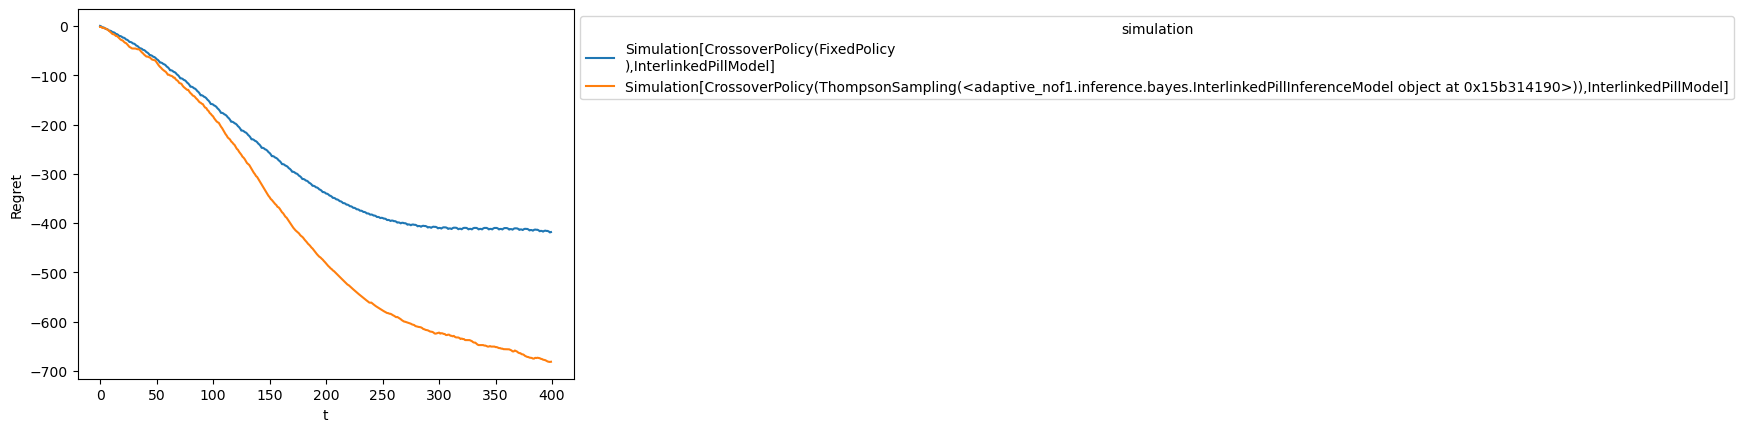

In [158]:
from adaptive_nof1.metrics import SimpleRegret

SeriesOfSimulations.plot_lines(
    [fixed_schedule_series, adaptive_series], SimpleRegret(outcome_name="outcome")
)

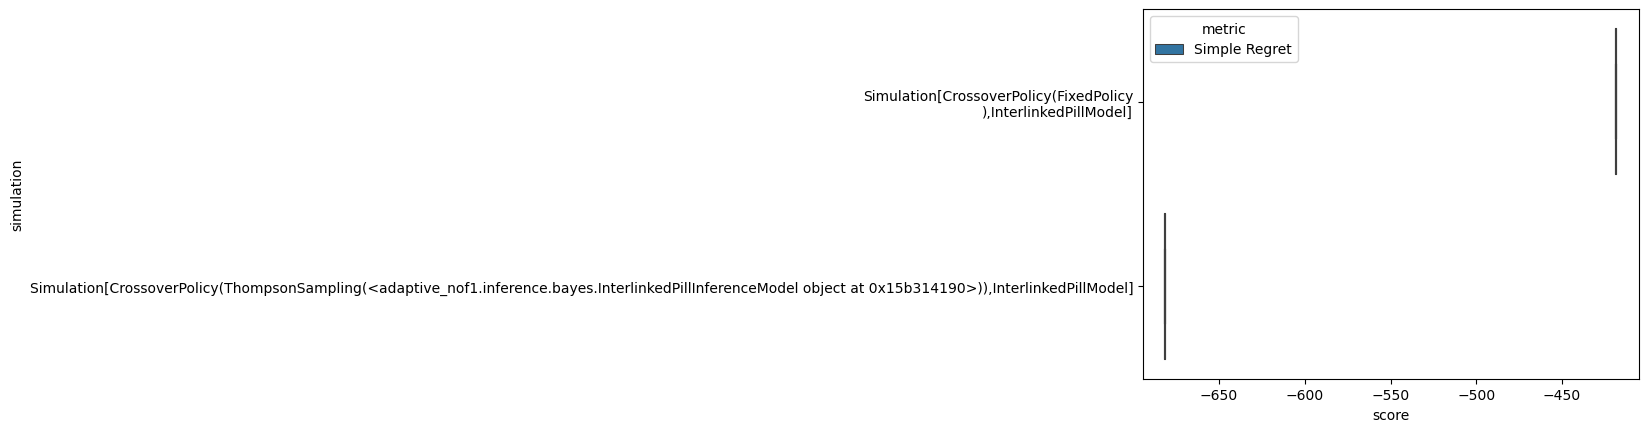

In [159]:
SeriesOfSimulations.plot_bar(
    [fixed_schedule_series, adaptive_series],
    [SimpleRegret(outcome_name="outcome")],
)

Additionally, one can look at each individual assignment:
If you hover over this graphic, you get detailed information about the assignment, including the counterfactual outcomes if another action would have been chosen.
Try it out yourself!

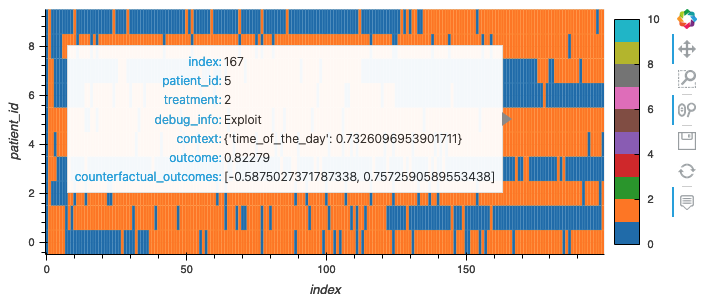

In [160]:
fixed_schedule_series.plot_allocations(treatment_name="type_of_pill")

:HeatMap   [index,patient_id]   (type_of_pill,debug_info,context,outcome,counterfactual_outcomes,type_of_pill)

In [161]:
adaptive_series.plot_allocations(treatment_name="dose")

:HeatMap   [index,patient_id]   (dose,debug_info,context,outcome,counterfactual_outcomes,dose)

There are many more policies, metrics, and models to explore. You can find an overview in the respective '\_\_init__.py' files in the folders, which include the different policies.

array([[<Axes: title={'center': 'intercept_type_of_pill'}>,
        <Axes: title={'center': 'intercept_type_of_pill'}>],
       [<Axes: title={'center': 'slopes_type_of_pill'}>,
        <Axes: title={'center': 'slopes_type_of_pill'}>],
       [<Axes: title={'center': 'intercept_dose'}>,
        <Axes: title={'center': 'intercept_dose'}>]], dtype=object)

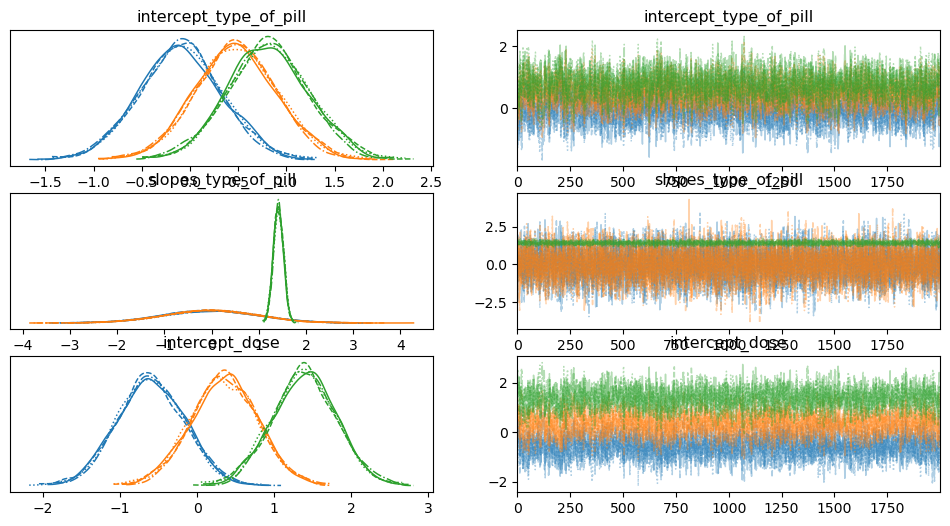

In [162]:
import arviz as az

model = adaptive_series.simulations[0].policy.policy.inference
az.plot_trace(model.trace)